# NLP Assignment 1 (40% of grade): Sentiment Analysis from Tweets

This coursework will involve you implementing functions for a text classifier, which you will train to identify the **sentiment expressed in a text** in a dataset of approx. 27,000 entries, which will be split into a 80%/20% training/test split. 

In this template you are given the basis for that implementation, though some of the functions are missing, which you have to fill in.

Follow the instructions file **NLP_Assignment_1_Instructions.pdf** for details of each question - the outline of what needs to be achieved for each question is as below.

You must submit all **ipython notebooks and extra resources you need to run the code if you've added them** in the code submission, and a **2 page report (pdf)** in the report submission on QMPlus where you report your methods and findings according to the instructions file for each question. **NB:** this report is strictly limited to 2 pages, and any additional pages will not be considered during marking. You are expected to write concisely within the 2 pages, and any additional texts beyond this will not be considered as part of the report.

In [1]:
import csv                               # csv reader
from sklearn.svm import LinearSVC
from nltk.classify import SklearnClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import precision_recall_fscore_support # to report on precision and recall
import numpy as np



In [2]:
def load_data(path):
    """Load data from a tab-separated file and append it to raw_data."""
    with open(path) as f:
        reader = csv.reader(f, delimiter='\t')  #delimiter='\t' tells Python's CSV reader that columns seperated by tab, not comma
        for line in reader:                         
            (label, text) = parse_data_line(line)   # NOTE csv file contains [row_id, label, text]. parse_data_line() extracts: (label, text)
            raw_data.append((text, label))          # .append is a list method NOTE raw_data is a list of (text, label)

# Splits raw_data into training and test sets, converting text to feature vectors for both.
# NOTE you might want to alter this when you stem and lemmatise 
def split_and_preprocess_data(percentage):      # NOTE how this function splits AND preprocesses!
    """Split the data between train_data and test_data according to the percentage
    and performs the preprocessing."""
    num_samples = len(raw_data)
    num_training_samples = int((percentage * num_samples)) #NOTE line that references % !!
    for (text, label) in raw_data[:num_training_samples]:
        train_data.append((to_feature_vector(pre_process(text)),label))   # NOTE to_feature_vector is the function I define
    for (text, label) in raw_data[num_training_samples:]:
        test_data.append((to_feature_vector(pre_process(text)),label))
        
def parse_data_line(data_line):
    """Return a tuple of the label as just POSITIVE or NEGATIVE and the statement"""
    return (data_line[1], data_line[2])  #NOTE this gets rid of ID in first column. we dont need it


# NOTE you might want to alter this when you stem and lemmatise 
# NOTE might want to alter this for N grams too 
def pre_process(text):
    """Return a list of tokens"""
    return text.split()

In [3]:
# test
text = "RT @colonelkickhead: Another bloody instant restaurant week?!?! Seriously! They just jumped the shark riding two other sharks powered by sh…"
pre_process(text)

['RT',
 '@colonelkickhead:',
 'Another',
 'bloody',
 'instant',
 'restaurant',
 'week?!?!',
 'Seriously!',
 'They',
 'just',
 'jumped',
 'the',
 'shark',
 'riding',
 'two',
 'other',
 'sharks',
 'powered',
 'by',
 'sh…']

# Question 1: Basic Feature Extraction (10 marks)

In [4]:
import glob
from nltk.tbl import feature


global_feature_dict = {} # A global dictionary of features

#Function takes as input list and returns bag-of-words representation as feature_dict
def to_feature_vector(tokens):
    feature_dict = {}

    for token in tokens:
        if token in feature_dict:
            feature_dict[token] += 1
        else:
            feature_dict[token] = 1

        #Using global_feature_dict to track nuumber of words
        if token not in global_feature_dict:
            global_feature_dict[token] = len(global_feature_dict)
    return feature_dict

text = "RT @colonelkickhead: Another bloody instant restaurant week?!?! Seriously! They just jumped the shark riding two other sharks powered by sh…"

print(to_feature_vector(pre_process(text)))

print(f"Unique token IDs {global_feature_dict}\nNumber of unique tokens = {len(global_feature_dict)}")
        


{'RT': 1, '@colonelkickhead:': 1, 'Another': 1, 'bloody': 1, 'instant': 1, 'restaurant': 1, 'week?!?!': 1, 'Seriously!': 1, 'They': 1, 'just': 1, 'jumped': 1, 'the': 1, 'shark': 1, 'riding': 1, 'two': 1, 'other': 1, 'sharks': 1, 'powered': 1, 'by': 1, 'sh…': 1}
Unique token IDs {'RT': 0, '@colonelkickhead:': 1, 'Another': 2, 'bloody': 3, 'instant': 4, 'restaurant': 5, 'week?!?!': 6, 'Seriously!': 7, 'They': 8, 'just': 9, 'jumped': 10, 'the': 11, 'shark': 12, 'riding': 13, 'two': 14, 'other': 15, 'sharks': 16, 'powered': 17, 'by': 18, 'sh…': 19}
Number of unique tokens = 20


In [5]:
# TRAINING AND VALIDATING OUR CLASSIFIER
   
 # This Function takes training data and returns a trained classifier
def train_classifier(data):     
    print("Training Classifier...")
    pipeline =  Pipeline([('svc', LinearSVC())])
    # Creates a scikit-learn Pipeline with a single step:
    # 'svc' is the name given to this step
    # LinearSVC() is a Linear Support Vector Classifier - a machine learning
    #  algorithm that finds the best hyperplane to separate different classes

    return SklearnClassifier(pipeline).train(data)
    # Wraps the scikit-learn pipeline in NLTK's SklearnClassifier adapter,
    # trains it on the provided data, and returns the trained classifier
    # This allows scikit-learn models to work with NLTK's classification interface


# Question 2: Cross-validation (20 marks)

In [6]:
# PREDICTING LABELS GIVEN A CLASSIFIER

def predict_labels(samples, classifier):
    """Assuming preprocessed samples, return their predicted labels from the classifier model."""
    return classifier.classify_many(samples)

def predict_label_from_raw(sample, classifier):
    """Assuming raw text, return its predicted label from the classifier model."""
    return classifier.classify(to_feature_vector(preProcess(reviewSample)))

In [7]:
# solution
from sklearn.metrics import precision_recall_fscore_support, accuracy_score
import random

# Initialize and load data
raw_data = []
train_data = []   # NOTE how the split_and_preprocess_data defined in first cell 
test_data = []     # Is being used below. The remainder 20% is being allocated to test data

#Loading data and appending it to raw_data
load_data('sentiment-dataset.tsv')   #csv file contains [row_id, label, text]
print(f"Loaded {len(raw_data)} tweets")

# Split into 80% train / 20% test
split_and_preprocess_data(0.8)
print(f"Training data: {len(train_data)}")
print(f"Test data: {len(test_data)}")

def cross_validate(dataset, folds):
    """
    Perform k-fold cross validation on the dataset
    :param dataset: list of (feature_vector, label) tuples
    :param folds: number of folds (k=10)
    :return: dictionary with average precision, recall, f1, accuracy
    """
    #Dictionary of results 
    results = {'precision': [], 'recall': [], 'f1': [], 'accuracy': []}
    
    # NOTE it is important to set random seed for reproducibility
    random.seed(42) 

    # Shuffle data for better cross-validation
    data = dataset[:]
    random.shuffle(data)
    
    fold_size = len(data) // folds
    
    # Use range(folds) to ensure exactly 10 folds
    for fold_idx in range(folds):
        start = fold_idx * fold_size
        # Last fold gets any remaining items
        end = start + fold_size if fold_idx < folds - 1 else len(data)
        
        print(f"Fold {fold_idx+1}/{folds}: Testing on items {start} - {end}")
        
        # Split into test fold and training folds
        test_fold = data[start:end]   # NOTE Dont confuse "test_fold" for test_data
        train_fold = data[:start] + data[end:]
        
        # Train the classifier on training foldsbblh hgud
        classifier = train_classifier(train_fold)
        
        # Extract features and labels from test fold
        test_features = [x[0] for x in test_fold]
        test_labels = [x[1] for x in test_fold]
        
        # Get predictions
        predictions = predict_labels(test_features, classifier)
        
        # Calculate metrics for this fold
        precision, recall, f1, _ = precision_recall_fscore_support(
            test_labels, 
            predictions, 
            average='weighted',
            zero_division=0
        )
        acc = accuracy_score(test_labels, predictions)
        
        # Store results
        results['precision'].append(precision)
        results['recall'].append(recall)
        results['f1'].append(f1)
        results['accuracy'].append(acc)
        
        # Print fold results
        print(f"  Precision: {precision:.4f}, Recall: {recall:.4f}, "
              f"F1: {f1:.4f}, Accuracy: {acc:.4f}\n")
    
    # Calculate and print average results across all folds
    cv_results = {
        'precision': sum(results['precision']) / folds,
        'recall': sum(results['recall']) / folds,
        'f1': sum(results['f1']) / folds,
        'accuracy': sum(results['accuracy']) / folds
    }
    
    print("=" * 50)
    print("Average Cross-Validation Results:")
    print(f"  Precision: {cv_results['precision']:.4f}")
    print(f"  Recall:    {cv_results['recall']:.4f}")
    print(f"  F1 Score:  {cv_results['f1']:.4f}")
    print(f"  Accuracy:  {cv_results['accuracy']:.4f}")
    print("=" * 50)
    
    return cv_results

# Cross-validate on TRAIN_DATA (80%), not raw_data (100%)
cv_results = cross_validate(train_data, 10)

Loaded 33540 tweets
Training data: 26832
Test data: 6708
Fold 1/10: Testing on items 0 - 2683
Training Classifier...
  Precision: 0.8303, Recall: 0.8327, F1: 0.8306, Accuracy: 0.8327

Fold 2/10: Testing on items 2683 - 5366
Training Classifier...
  Precision: 0.8268, Recall: 0.8286, F1: 0.8274, Accuracy: 0.8286

Fold 3/10: Testing on items 5366 - 8049
Training Classifier...
  Precision: 0.8306, Recall: 0.8327, F1: 0.8311, Accuracy: 0.8327

Fold 4/10: Testing on items 8049 - 10732
Training Classifier...
  Precision: 0.8363, Recall: 0.8382, F1: 0.8365, Accuracy: 0.8382

Fold 5/10: Testing on items 10732 - 13415
Training Classifier...
  Precision: 0.8272, Recall: 0.8293, F1: 0.8277, Accuracy: 0.8293

Fold 6/10: Testing on items 13415 - 16098
Training Classifier...
  Precision: 0.8174, Recall: 0.8196, F1: 0.8178, Accuracy: 0.8196

Fold 7/10: Testing on items 16098 - 18781
Training Classifier...
  Precision: 0.8308, Recall: 0.8319, F1: 0.8313, Accuracy: 0.8319

Fold 8/10: Testing on items 1

In [8]:
# MAIN

# loading reviews
# initialize global lists that will be appended to by the methods below
raw_data = []          # the filtered data from the dataset file
train_data = []        # the pre-processed training data as a percentage of the total dataset
test_data = []         # the pre-processed test data as a percentage of the total dataset


# references to the data files
data_file_path = 'sentiment-dataset.tsv'

# Do the actual stuff (i.e. call the functions we've made)
# We parse the dataset and put it in a raw data list
print("Now %d rawData, %d trainData, %d testData" % (len(raw_data), len(train_data), len(test_data)),
      "Preparing the dataset...",sep='\n')

load_data(data_file_path) 

# We split the raw dataset into a set of training data and a set of test data (80/20)
# You do the cross validation on the 80% (training data)
# We print the number of training samples and the number of features before the split
print("Now %d rawData, %d trainData, %d testData" % (len(raw_data), len(train_data), len(test_data)),
      "Preparing training and test data...",sep='\n')

split_and_preprocess_data(0.8)

# We print the number of training samples and the number of features after the split
print("After split, %d rawData, %d trainData, %d testData" % (len(raw_data), len(train_data), len(test_data)),
      "Training Samples: ", len(train_data), "Features: ", len(global_feature_dict), sep='\n')


Now 0 rawData, 0 trainData, 0 testData
Preparing the dataset...
Now 33540 rawData, 0 trainData, 0 testData
Preparing training and test data...
After split, 33540 rawData, 26832 trainData, 6708 testData
Training Samples: 
26832
Features: 
104040


In [9]:
cross_validate(train_data, 10)  # will work and output overall performance of p, r, f-score when cv implemented

Fold 1/10: Testing on items 0 - 2683
Training Classifier...
  Precision: 0.8303, Recall: 0.8327, F1: 0.8306, Accuracy: 0.8327

Fold 2/10: Testing on items 2683 - 5366
Training Classifier...
  Precision: 0.8268, Recall: 0.8286, F1: 0.8274, Accuracy: 0.8286

Fold 3/10: Testing on items 5366 - 8049
Training Classifier...
  Precision: 0.8306, Recall: 0.8327, F1: 0.8311, Accuracy: 0.8327

Fold 4/10: Testing on items 8049 - 10732
Training Classifier...
  Precision: 0.8363, Recall: 0.8382, F1: 0.8365, Accuracy: 0.8382

Fold 5/10: Testing on items 10732 - 13415
Training Classifier...
  Precision: 0.8272, Recall: 0.8293, F1: 0.8277, Accuracy: 0.8293

Fold 6/10: Testing on items 13415 - 16098
Training Classifier...
  Precision: 0.8174, Recall: 0.8196, F1: 0.8178, Accuracy: 0.8196

Fold 7/10: Testing on items 16098 - 18781
Training Classifier...
  Precision: 0.8308, Recall: 0.8319, F1: 0.8313, Accuracy: 0.8319

Fold 8/10: Testing on items 18781 - 21464
Training Classifier...
  Precision: 0.8396, 

{'precision': 0.8290417529015743,
 'recall': 0.8309857291686187,
 'f1': 0.8293654097275075,
 'accuracy': 0.8309857291686187}

# Question 3: Error Analysis (20 marks)

In [10]:
from sklearn import metrics
import matplotlib.pyplot as plt
# a function to make the confusion matrix readable and pretty
def confusion_matrix_heatmap(y_test, preds, labels):
    """Function to plot a confusion matrix"""
    # pass labels to the confusion matrix function to ensure right order
    # cm = metrics.confusion_matrix(y_test, preds, labels)
    cm = metrics.confusion_matrix(y_test, preds, labels=labels)
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111)
    cax = ax.matshow(cm)
    plt.title('Confusion matrix of the classifier')
    fig.colorbar(cax)
    ax.set_xticks(np.arange(len(labels)))
    ax.set_yticks(np.arange(len(labels)))
    ax.set_xticklabels( labels, rotation=45)
    ax.set_yticklabels( labels)

    for i in range(len(cm)):
        for j in range(len(cm)):
            text = ax.text(j, i, cm[i, j],
                           ha="center", va="center", color="w")

    plt.xlabel('Predicted')
    plt.ylabel('True')
    
    # fix for mpl bug that cuts off top/bottom of seaborn viz:
    b, t = plt.ylim() # discover the values for bottom and top
    b += 0.5 # Add 0.5 to the bottom
    t -= 0.5 # Subtract 0.5 from the top
    plt.ylim(b, t) # update the ylim(bottom, top) values
    plt.show() # ta-da!
    plt.show()

Training on 24149 samples
Testing on 2683 samples
Training Classifier...

Confusion Matrix:
[[ 563  255]
 [ 212 1653]]

Format:
                Predicted Negative | Predicted Positive
Actually Negative |      TN          |       FP
Actually Positive |      FN          |       TP

Where:
TN = True Negative  (correctly predicted negative)
FP = False Positive (wrongly predicted positive, actually negative)
FN = False Negative (wrongly predicted negative, actually positive)
TP = True Positive  (correctly predicted positive)


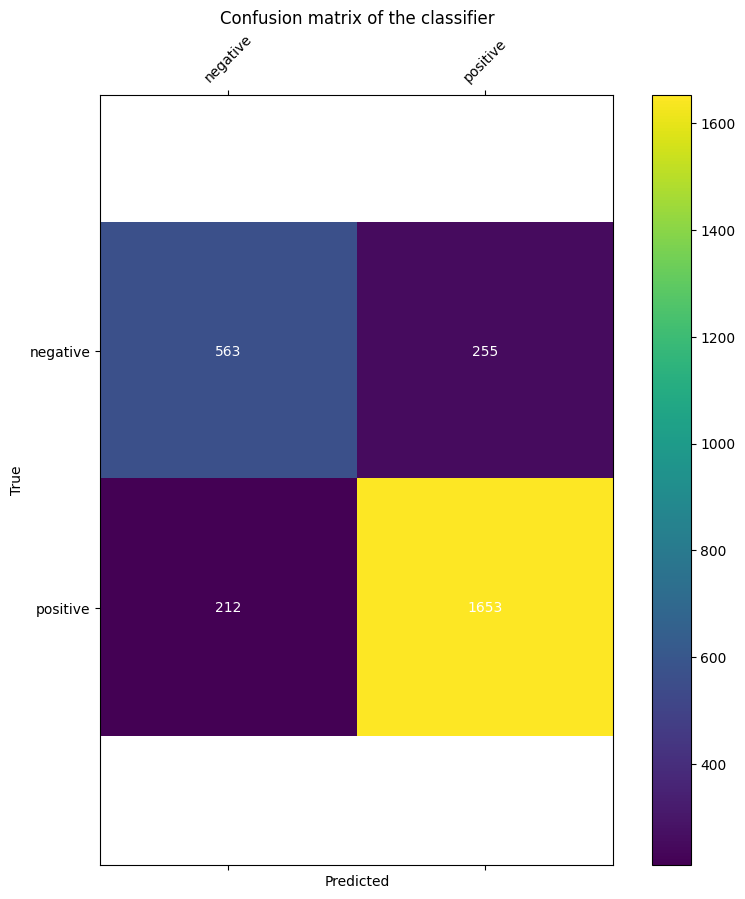


ERROR SUMMARY:
False Positives (predicted positive, actually negative): 255
False Negatives (predicted negative, actually positive): 212
Total Errors: 467
Accuracy: 0.8259

Error analysis saved to 'error_analysis_q3.txt'


In [11]:
# =============================================================================
# QUESTION 3: ERROR ANALYSIS (20 marks)
# =============================================================================

from sklearn import metrics
import numpy as np


# Splitting training data for error analysis
# We use the first fold (10%)of train data as our test set for error analysis
# and the remaining 9 folds (90%) for training

fold_size = int(len(train_data) / 10)   # Calculates size of one fold (10% of training data)
test_fold = train_data[:fold_size]      # First fold becomes our test set for analysis
train_folds = train_data[fold_size:]    # Remaining 9 folds become our training set

# Display sizes to confirm split
print(f"Training on {len(train_folds)} samples")  # Should be ~24,149 (90% of 26,832)
print(f"Testing on {len(test_fold)} samples")     # Should be ~2,683 (10% of 26,832)


# Train the classifier on 9 folds
# This trains a LinearSVC classifier wrapped in SklearnClassifier
# on the 90% training data
classifier = train_classifier(train_folds)


# Prepare test data and get predictions
# We need just the labels for evaluation
test_labels = [label for feature_dict, label in test_fold]

# Extract just the feature dictionaries from test_fold
# predict_labels() expects a list of feature dicts, not full tuples
test_features = [feature_dict for feature_dict, label in test_fold]

# Get predictions from the classifier on the test features
predictions = predict_labels(test_features, classifier)

# Create and display confusion matrix
# Defining the label order (important for correct matrix interpretation)
labels = ['negative', 'positive']  # Row/column order in matrix

# Create the confusion matrix
# sklearn.metrics.confusion_matrix compares true labels vs predictions
cm = metrics.confusion_matrix(test_labels, predictions, labels=labels)

# Display the confusion matrix with interpretation guide
print("\nConfusion Matrix:")
print(cm)
print("\nFormat:")
print("                Predicted Negative | Predicted Positive")
print("Actually Negative |      TN          |       FP")
print("Actually Positive |      FN          |       TP")
print("\nWhere:")
print("TN = True Negative  (correctly predicted negative)")
print("FP = False Positive (wrongly predicted positive, actually negative)")
print("FN = False Negative (wrongly predicted negative, actually positive)")
print("TP = True Positive  (correctly predicted positive)")

# Visualize the confusion matrix using the provided heatmap function
# This creates a colored visualization where lighter colors = more samples
confusion_matrix_heatmap(test_labels, predictions, labels)

# Extracting misclasified examples (False Positives & False Negatives)
false_positives = []  # tweets wrongly classified as positive
false_negatives = []  #  tweets wrongly classified as negative

# Iterate through all test samples and their predictions
for i, (feature_dict, true_label) in enumerate(test_fold):
    pred_label = predictions[i]  # Get the predicted label for this sample
    
    # Check for False Positive:
    # Predicted positive but actually negative (Type I error)
    if pred_label == 'positive' and true_label == 'negative':
        # Store the feature_dict, true label, and predicted label
        false_positives.append((feature_dict, true_label, pred_label))
    
    # Check for False Negative:
    # Predicted negative but actually positive (Type II error)
    elif pred_label == 'negative' and true_label == 'positive':
        # Store the feature_dict, true label, and predicted label
        false_negatives.append((feature_dict, true_label, pred_label))

# Display counts of errors found
print(f"\n{'='*80}")
print(f"ERROR SUMMARY:")
print(f"{'='*80}")
print(f"False Positives (predicted positive, actually negative): {len(false_positives)}")
print(f"False Negatives (predicted negative, actually positive): {len(false_negatives)}")
print(f"Total Errors: {len(false_positives) + len(false_negatives)}")
print(f"Accuracy: {(len(test_fold) - len(false_positives) - len(false_negatives)) / len(test_fold):.4f}")

#
# STEP 6: Saving all errors to file for detailed analysis
# Write all misclassified examples to a text file for manual inspection
with open('error_analysis_q3.txt', 'w', encoding='utf-8') as f:
    # Write header
    f.write("=" * 80 + "\n")
    f.write("QUESTION 3: ERROR ANALYSIS\n")
    f.write("=" * 80 + "\n\n")
    
    # Writing all False Positives
    f.write(f"FALSE POSITIVES (Predicted Positive, Actually Negative): {len(false_positives)}\n")
    f.write("=" * 80 + "\n")
    f.write("These are NEGATIVE tweets that the classifier wrongly thought were POSITIVE.\n")
    f.write("Look for patterns: sarcasm? positive words in negative context?\n")
    f.write("=" * 80 + "\n\n")
    
    # Iterate through each false positive and write details
    for idx, (feature_dict, true_label, pred_label) in enumerate(false_positives, 1):
        f.write(f"FALSE POSITIVE #{idx}\n")
        f.write("-" * 80 + "\n")
        
        # Reconstruct tweet text from feature dictionary keys (the words)
        tweet_words = list(feature_dict.keys())
        f.write(f"Tweet: {' '.join(tweet_words)}\n")
        
        # Write the labels
        f.write(f"True Label: {true_label}\n")
        f.write(f"Predicted Label: {pred_label}\n")
        
        # Write top features (most frequent words in this tweet)
        top_features = sorted(feature_dict.items(), key=lambda x: x[1], reverse=True)[:5]
        f.write(f"Top features: {top_features}\n")
        f.write("-" * 80 + "\n\n")
    
   
    # Writing all False Negatives
    f.write("\n" + "=" * 80 + "\n")
    f.write(f"FALSE NEGATIVES (Predicted Negative, Actually Positive): {len(false_negatives)}\n")
    f.write("=" * 80 + "\n")
    f.write("These are POSITIVE tweets that the classifier wrongly thought were NEGATIVE.\n")
    f.write("Look for patterns: weak positive words? negated negatives (not bad)?\n")
    f.write("=" * 80 + "\n\n")
    
    # Iterate through each false negative and write details
    for idx, (feature_dict, true_label, pred_label) in enumerate(false_negatives, 1):
        f.write(f"FALSE NEGATIVE #{idx}\n")
        f.write("-" * 80 + "\n")
        
        # Reconstruct tweet text from feature dictionary keys
        tweet_words = list(feature_dict.keys())
        f.write(f"Tweet: {' '.join(tweet_words)}\n")
        
        # Write the labels
        f.write(f"True Label: {true_label}\n")
        f.write(f"Predicted Label: {pred_label}\n")
        
        # Write top features
        top_features = sorted(feature_dict.items(), key=lambda x: x[1], reverse=True)[:5]
        f.write(f"Top features: {top_features}\n")
        f.write("-" * 80 + "\n\n")

# Confirm file was saved
print(f"\n{'='*80}")
print(f"Error analysis saved to 'error_analysis_q3.txt'")
print(f"{'='*80}")



# Question 4: Optimising pre-processing and feature extraction (50 marks)

**Note:** it is advisable to implement question 4 in a separate notebook where you further develop the pre-processing and feature extraction functions you implemented above.

In [12]:
# Finally, check the accuracy of your classifier by training on all the traning data
# and testing on the test set
# Will only work once all functions are complete
# NOTE this comment is a test!!!!!
functions_complete = True  # set to True once you're happy with your methods for cross val
if functions_complete:
    print(test_data[0])   # have a look at the first test data instance
    classifier = train_classifier(train_data)  # train the classifier
    test_true = [t[1] for t in test_data]   # get the ground-truth labels from the data
    test_pred = predict_labels([x[0] for x in test_data], classifier)  # classify the test data to get predicted labels
    final_scores = precision_recall_fscore_support(test_true, test_pred, average='weighted') # evaluate
    print("Done training!")
    print("\nPerformance of baseline model with no modifications or preprocessing techniques \nPrecision: %f\nRecall: %f\nF Score:%f" % final_scores[:3])

({'Tomorrow': 1, "we'll": 1, 'release': 1, 'our': 2, '58th': 1, 'episode': 1, 'of': 1, '#HSonAir': 1, 'profiling': 1, 'very': 1, 'own': 1, '@AlissaDosSantos': 1, '!': 1, "We'll": 1, 'talk': 1, 'about': 1, 'storytelling': 1, 'and': 1, 'Beyonce!': 1}, 'positive')
Training Classifier...
Done training!

Performance of baseline model with no modifications or preprocessing techniques 
Precision: 0.833367
Recall: 0.835122
F Score:0.833840
